<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Identificando  Burger Master con MMG

El Burger Master es un evento creado en el 2016 por el *influencer* Tulio Zuluaga, más conocido en redes como Tulio recomienda, el cual busca que por una semana las hamburgueserías de cada ciudad ofrezcan su mejor producto a un precio reducido. 

El evento ha venido creciendo y en el 2022 se extendió por 21 ciudades de Colombia para las cuales se estimó que se vendieron más de dos millones de hamburguesas. El objetivo del presente caso-taller  es identificar los puntos calientes de hamburgueserías  que compitieron en  la ciudad de Bogotá aplicando el Modelo de Mezclas Gaussianas.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo

### 1. Carga de datos  

En la carpeta `data` se encuentra el archivo `burger_master.xlsx` para la ciudad de Bogotá, cargue estos datos en su *cuaderno* y reporte brevemente el contenido de la base.

In [193]:
import pandas as pd
import geopandas as gpd
import folium
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

In [194]:
df=pd.read_excel('./data/burger_master.xlsx')
df.head(10)

,Restaurante,Dirección,Descripción,Latitud,Longitud
0,MAIKKI,Cra 75 # 24D – 48,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.668833,-74.116828
1,MAIKKI,Calle 119 # 11A – 24,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.698395,-74.036585
2,MAIKKI,Cra 47A # 98 – 47,"<p>MAIKKI MACUIRA: Cama de chicharrón soplado,...",4.686401,-74.060144
3,FRENCHEESE,Calle 51 #22-55,"<p>Presentamos «La French Master», inspirada e...",4.639514,-74.073545
4,FRENCHEESE,Calle 80 #14-41,"<p>Presentamos «La French Master», inspirada e...",4.666147,-74.056758
5,BY BROTHERS BURGER,Diagonal 47 #74B – 80 Normandía,<p>¡Nuestra hamburguesa es un viaje por las re...,4.672071,-74.113053
6,BOZGOS,Diagonal 40A # 7 – 38,"<p>HECHICERA: Es un embrujo, es magia, es PURO...",4.626276,-74.066033
7,GRATIN BURGER,Autopista norte #146-48,<p>En familia logramos componer una hamburgues...,4.729346,-74.049418
8,GRATIN BURGER,Av. Cra 24 #39B-20,<p>En familia logramos componer una hamburgues...,4.609244,-74.088981
9,GRATIN BURGER,Av. Calle 100#50-08,<p>En familia logramos componer una hamburgues...,4.698271,-74.073048


In [195]:
print(f"Existen {df.shape[0]} filas y {df.shape[1]} columnas")
df['Restaurante'].value_counts()

Existen 137 filas y 5 columnas


LA HAMBURGUESERÍA             22
XL COLOMBIA GOURMET           16
PECADO CAPITAL                 7
GRATIN BURGER                  6
LONGO'S (CHORILONGO)           4
                              ..
PRIMITIVO                      1
EL CHORI CHARRÚA CAMPESTRE     1
DONDE TU QUIERAS               1
ANGUS AZUL BURGER              1
LA HIERRA CHÍA                 1
Name: Restaurante, Length: 63, dtype: int64

In [196]:
porcentaje_categorias = pd.DataFrame((df['Restaurante'].value_counts() / len(df)) * 100)
porcentaje_categorias

,Restaurante
LA HAMBURGUESERÍA,16.058394
XL COLOMBIA GOURMET,11.678832
PECADO CAPITAL,5.109489
GRATIN BURGER,4.379562
LONGO'S (CHORILONGO),2.919708
...,...
PRIMITIVO,0.729927
EL CHORI CHARRÚA CAMPESTRE,0.729927
DONDE TU QUIERAS,0.729927
ANGUS AZUL BURGER,0.729927


<Figure size 2000x1000 with 0 Axes>

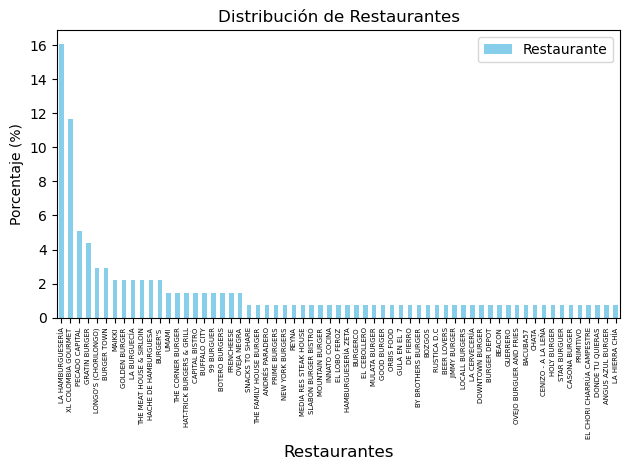

In [197]:
# Crea un gráfico de barras
plt.figure(figsize=(20, 10))
porcentaje_categorias.plot(kind='bar', color='skyblue')
plt.title('Distribución de Restaurantes')
plt.xlabel('Restaurantes', fontsize = 12)
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90,fontsize=5)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

In [198]:
df['Descripción'][0]

'<p>MAIKKI MACUIRA: Cama de chicharrón soplado, tocineta caramelizada en melao de maracuyá y panela de la hoya del rio Suárez, carne de res del Magdalena medio, queso fresco de pasta hilada, mayonesa de cilantro cimarrón del pacifico, cogollo de lechuga y pan artesanal. Un homenaje a lo nuestro. En pie de lucha por la comida rápida colombiana<br/><br/>Cra 75 # 24D – 48, Modelia<br/>Calle 119 # 11A – 24, Santa Bárbara<br/>Cra 47A # 98 – 47, Castellana</p>'

Una vez cargada la data de Burguer Mastert, lo que hacemos es visualizar en un dataframe los campos y podemos observar que se trata de 137 Puntos de venta con sus respectivas ubicaciones en terminos de dirección, latitud y longitud pero a su vez existen restaurantes que tiene varias sucursales como "LA HAMBURGUESERÍA" la cual tiene 22 y por eso la concentración de data en esta cadena. En resumen son 63 cadenas unicas de restaurantes analizadas. Además hay un campo de texto que contiene una Descripción de la hamburguesa ofrecida por cada cadena.

Habiendo entendido que el texto contenido de la descripción se separan por `<br/>` ya que después de esto salen las mismas direcciones de cada sucursal y en algunos casos los barrios de cada una hacemos una limpieza basica para quedarnos con la descripción particular de cada hamburguesa.

In [199]:
# Definir una función para limpiar el texto
def limpiar_texto(texto):
    partes = texto.split('<br/>')  # Dividir el texto en partes usando <br/> como separador
    return partes[0]  # Tomar la primera parte

# Aplicar la función a la columna 'Descripción'
df['Descripción'] = df['Descripción'].apply(limpiar_texto)

# Definir una función para quitar las etiquetas <p>
def quitar_etiquetas(texto):
    texto_sin_p = texto.replace('<p>', '').replace('</p>', '')
    return texto_sin_p

# Aplicar la función a la columna 'Descripción'
df['Descripción'] = df['Descripción'].apply(quitar_etiquetas)

# Mostrar el DataFrame resultante
df['Descripción'][0]

'MAIKKI MACUIRA: Cama de chicharrón soplado, tocineta caramelizada en melao de maracuyá y panela de la hoya del rio Suárez, carne de res del Magdalena medio, queso fresco de pasta hilada, mayonesa de cilantro cimarrón del pacifico, cogollo de lechuga y pan artesanal. Un homenaje a lo nuestro. En pie de lucha por la comida rápida colombiana'

[nltk_data] Downloading package punkt to C:\Users\Daniel
[nltk_data]     Rozo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Daniel
[nltk_data]     Rozo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


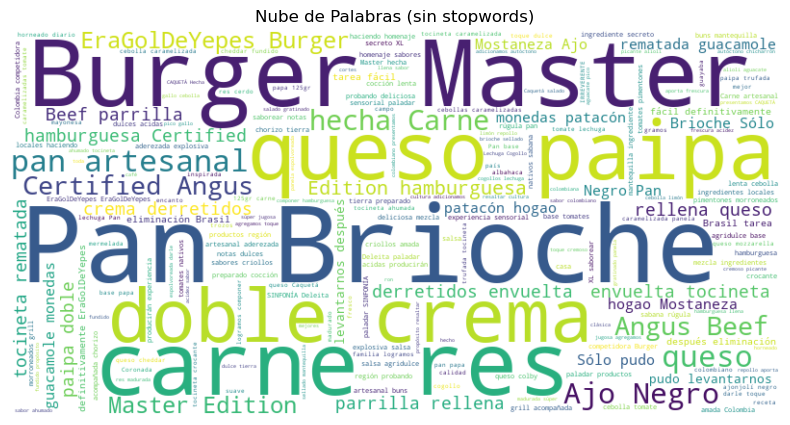

In [200]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Combina los textos en una sola cadena:
textos = " ".join(texto for texto in df["Descripción"])

# Tokeniza y elimina las stopwords
palabras = word_tokenize(textos, language="spanish")

# Obtiene las stopwords en español
stop_words = set(stopwords.words("spanish"))

# Filtra las stopwords
palabras_filtradas = [palabra for palabra in palabras if palabra.lower() not in stop_words]

textos_filtrados = " ".join(palabras_filtradas)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(textos_filtrados)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras (sin stopwords)")
plt.show()

In [201]:
df[df['Restaurante'] == "LA HAMBURGUESERÍA"]["Descripción"].iloc[0]

'#EraGolDeYepes! Burger Master Edition: Una hamburguesa Certified Angus Beef a la parrilla rellena de queso paipa y doble crema derretidos, envuelta en tocineta, rematada con guacamole y monedas de patacón con hogao. Mostaneza de Ajo Negro .Pan Brioche. Sólo eso pudo levantarnos después de la eliminación en Brasil. Y no fue tarea fácil, porque definitivamente… #EraGolDeYepes!'

Esto con el animo de visualizar rapidamente que tipo de ingredientes concentra los textos; pero obvimante esta muy concentrado en la "LA HAMBURGUESERÍA" por la cantidad de puntos de venta que tiene en la ciudad la cual resalta su Pan Brioche, queso paipa doble crema.

### 2.  Visualizando los datos

Visualice la ubicación de cada restaurante en un mapa interactivo. Añada un marcador para cada restaurante y la posibilidad de encontrar la descripción de la hamburguesa ofrecida en un pop-up. (Note que la columna Descripción contiene otra información adicional).

In [202]:
hamburguesas=gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitud, df.Latitud))

In [203]:
map = folium.Map(location = [hamburguesas.Latitud.mean(), hamburguesas.Longitud.mean()], tiles = "OpenStreetMap", zoom_start = 12)

for i in range(0,len(hamburguesas)):
   folium.Marker(
      location=[hamburguesas.iloc[i]['Latitud'], hamburguesas.iloc[i]['Longitud']]
   ).add_to(map)

for _, r in hamburguesas.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry'])
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': '#FFFFFF'})
    folium.Popup(r['Descripción']).add_to(geo_j)
    geo_j.add_to(map)
map

Con la libreria folium realizamos la visualización en un mapa interactivo y adicionamos el campo `Descripción` en un pop-up el cual aparece al hacer click a cualquier punto mostrando el tipo de hamburguesa que ofreca cada una de estas. Asi mismo nos podemos dar cuenta que la mayoría de los puntos de venta se ubican en el norte de Bogotá por los sectores de Chapinero y Usaquen principalmente. Asi mismo vemos que también hay 4 PDV que estan en el municipio de Chia y otros por la Calle 26 en camino hacia al aeropuerto.

### 3.  Análisis de puntos calientes

Aplique el modelo de Mezclas Gaussianas para buscar clusters de restaurantes en Bogotá, mencione qué estructura de covarianza usó y explique por qué. Escoja el número óptimo de componentes, explicando el procedimiento y justificando su elección.

Lo primero que hacemos es buscar con las metricas de BIC y AIC cual seria la mejor cantidad de componentes para poder hacer nuestro modelo de Mezclas Gaussianas.

In [204]:
X = hamburguesas[['Longitud','Latitud']].values

c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have

Text(0.5, 0, 'Número de componentes')

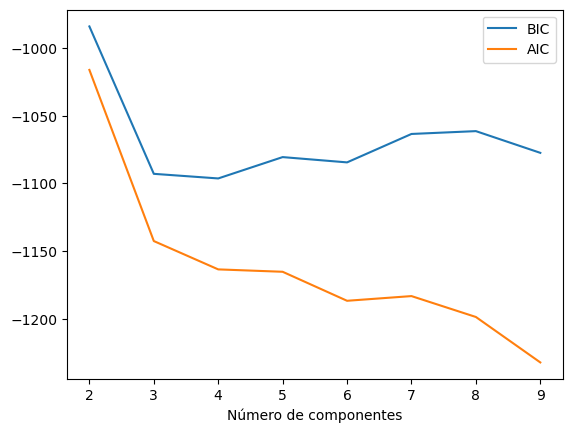

In [205]:
n_components = np.arange(2, 10)
models = [GaussianMixture(n, covariance_type='full', init_params= 'kmeans', random_state=123).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Número de componentes')

Habiendo evaluado ambas metricas hasta 9 componentes vemos que el BIC minimo se encuentra en 4 componentes y es el que vamos a implementar dado que con AIC pareciera que tenderia a sobreajustar el modelo y practicamente los clusteres se volverian muy pequeños. Posteriromente analizamos que matriz de covarianza usariamos.

In [206]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(2, 10),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X)

df_search = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df_search["mean_test_score"] = df_search["mean_test_score"]
df_search = df_search.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)

c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have

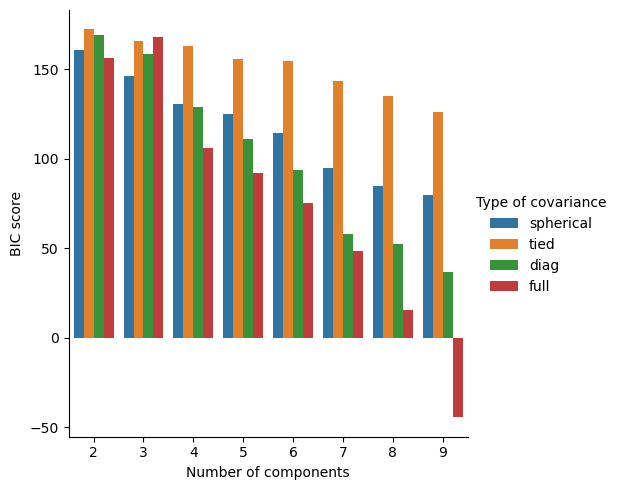

In [207]:
df_search.sort_values(by="BIC score").head()
import seaborn as sns

sns.catplot(
    data=df_search,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

Analizando los resultados vemos que la mejor covarianza es `full` con 4 componentes y por esa razón es la que usaremos para nuestros modelos. Estos modelos los graficaremos en nuestro mapa interactivo

In [208]:
MMG_hamburguesas = GaussianMixture(n_components=9, covariance_type='full', init_params= 'kmeans', random_state=123)
labels = MMG_hamburguesas.fit(X).predict(X)
hamburguesas['cluster'] = labels

c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [209]:
map = folium.Map(location = [hamburguesas.Latitud.mean(), hamburguesas.Longitud.mean()], tiles = "OpenStreetMap", zoom_start = 12)

colour = ['red',
    'orange',
    'green',
    'purple',
    'cadetblue',
    'black',
    'grey',
    'darkblue',
    'yellow']

def colorCall(val):
  val = int(val)
  return colour[val]

#capa clusters de restaurantes
for Latitud, Longitud, c in zip(hamburguesas['Latitud'], hamburguesas['Longitud'], hamburguesas['cluster']):
    folium.CircleMarker(
        [Latitud, Longitud],
        radius=8,
        fill_color = colorCall(c),
        fill=True,
        color=colorCall(c),
        fill_opacity=0.7
        ).add_to(map) 

map

Solo para cuestion de estudio y corroborar que hicieran sentido los clusteres vemos que haber escogido un modelo con 9 componenentes puede ser que tendiera sobreajustar como mencionamos al inicio esto se puede ver especialmente con el color azul y gris. El gris podria contenerse en azul y estariamos teniendo clusteres claramente separados entre si. Ya habiendo visto esto corremos el modelo con 4 componentes que es considerado como "mejor" modelo.

In [210]:
MMG_hamburguesas = GaussianMixture(n_components=4, covariance_type='full', init_params= 'kmeans', random_state=123)
labels = MMG_hamburguesas.fit(X).predict(X)
hamburguesas['cluster'] = labels

map = folium.Map(location = [hamburguesas.Latitud.mean(), hamburguesas.Longitud.mean()], tiles = "OpenStreetMap", zoom_start = 12)

colour = ['red',
    'orange',
    'green',
    'purple',
    'cadetblue',
    'black',
    'grey',
    'darkblue',
    'yellow']

def colorCall(val):
  val = int(val)
  return colour[val]

#capa clusters de restaurantes
for Latitud, Longitud, c in zip(hamburguesas['Latitud'], hamburguesas['Longitud'], hamburguesas['cluster']):
    folium.CircleMarker(
        [Latitud, Longitud],
        radius=8,
        fill_color = colorCall(c),
        fill=True,
        color=colorCall(c),
        fill_opacity=0.7
        ).add_to(map) 

map

c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Mientras que nuestro mejor modelo propuesto es el de 4 componentes dado por el BIC que vimos al inicio, el cual claramente demarca los puntos de venta de Chia en verde por su ubicación lejana, y los restaurantes de Bogotá que los divide en 3 clusteres uno al Nor-oriente de la ciudad (naranja) por los lados de la localidad de Usaquen, otro en morado que se ubica abajo de este limite de la carrera 30 siendo este visualmente más disperso y el último en color rojo el cual pareciera que es el más denso ubicado en la localidad de Chapinero.

#### 3.1. Visualización de los resultados

Visualice las densidades estimadas por el  mejor modelo estimado en la sección anterior usando un mapa de calor interactivo, discuta los resultados.

Tomando el modelo anterior de MMG graficamos inicialmente las densidades en forma de elipses para entender como se sobreponen bajo los 3 clusters ya identificados.

c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Daniel Rozo\AppData\Local\Temp\ipykernel_2632\1322865123.py:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


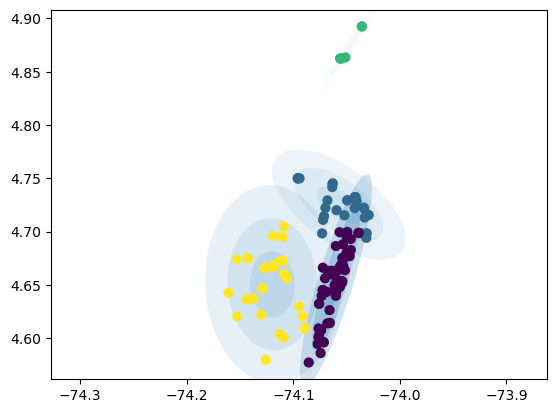

In [211]:
#Definimos una función que nos permite crear las curvas de nivel a través de elipses:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Dibuja un elipse dado la media y varianza"""
    ax = ax or plt.gca()

    # Convierte las covarianzas
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Dibuja el elipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

#Graficamos
plot_gmm(MMG_hamburguesas, hamburguesas[['Longitud','Latitud']])

Una vez graficadas las densidades de manera no interactiva, realizaremos nuestra grilla de valores para guardar los contornos de nuestro modelo para superponerla en nuestro mapa interactivo.

In [212]:
MMG_hamburguesas.fit(hamburguesas[['Latitud', 'Longitud']])

# Definir una grilla de valores para la gráfica de contorno
x = np.linspace(min(hamburguesas["Longitud"]), max(hamburguesas["Longitud"]), 200)
y = np.linspace(min(hamburguesas["Latitud"]), max(hamburguesas["Latitud"]), 200)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack((yy.flatten(), xx.flatten()))

# Calcular las probabilidades de densidad para cada punto en la grilla
densidad_pred = MMG_hamburguesas.score_samples(grid)
densidad_pred = np.exp(densidad_pred)

c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Daniel Rozo\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


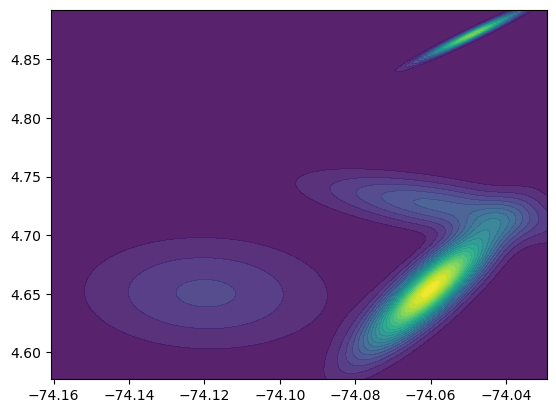

In [213]:
# Mapa interactivo con densidad de MMG
import geojsoncontour
# Graficar contornos
                         
geojson = geojsoncontour.contourf_to_geojson(
    contourf= plt.contourf(xx, yy, densidad_pred.reshape(xx.shape), cmap='viridis', levels=20,
    alpha =0.9, linestyles='None'),
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.1)

# Crear el mapa
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': '#FFFFFF',
        'lineColor': '#FFFFFF',
        'opacity':   0.5
    }).add_to(map)
map

Estas densidades se superponen perfectamente bajo los clusteres ya identificados y podemos explorar con mayor detenimiento los puntos calientes de Burguer Master que se ubica en el sector de Chapinero (rojos), seguido por Usaquen que se encuentran de color Naranja,  y se evidencia que se separan claramente por la densidad de los puntos. Asi mismo también se ubican los puntos de Chia en color verde que se encuentran fuera de Bogotá queda el otro cluster morado con una evidente dispersión por lo que hace sentido su separación.

### 4. Comparación con KDE

Estime ahora las densidades usando KDE bivariado de la librería `statsmodels` con el anchos de banda dado por `cv_ml`. Muestre los resultados usando un mapa interactivo. Compare los resultados obtenidos por el "mejor" modelo encontrado via MMG. 

c:\Users\Daniel Rozo\anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


El band width encontrado con cv_ml es: [0.00609795 0.00404396]


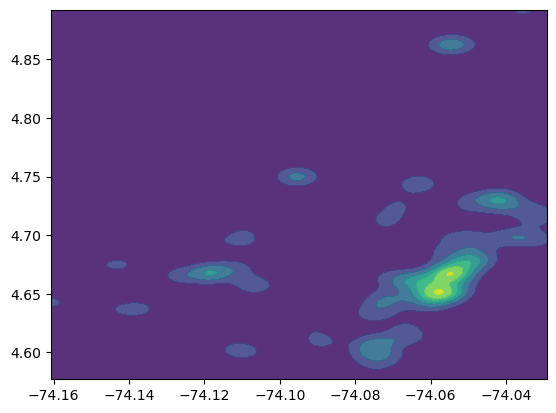

In [214]:
import seaborn as sns
import statsmodels.api as sm
from geopy.distance import geodesic
from sklearn.neighbors import KernelDensity
import geojsoncontour
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calcular densidad no paramétrica bivariada con ancho de banda cv_ml
dens_u_cv = sm.nonparametric.KDEMultivariate(data=hamburguesas[['Latitud', 'Longitud']], var_type='cc', bw='cv_ml')
print(f'El band width encontrado con cv_ml es: {dens_u_cv.bw}')

# Grilla de valores dentro del rango con cv_ml
x_cv = np.linspace(min(hamburguesas["Longitud"]), max(hamburguesas["Longitud"]), 200)
y_cv = np.linspace(min(hamburguesas["Latitud"]), max(hamburguesas["Latitud"]), 200)
xx_cv, yy_cv = np.meshgrid(x_cv, y_cv)
grid_cv = np.column_stack((yy_cv.flatten(), xx_cv.flatten()))

# Calcular densidad predicha
densidad_pred_cv = dens_u_cv.pdf(data_predict=grid_cv)

# Graficar contornos
                        
geojson = geojsoncontour.contourf_to_geojson(
    contourf= plt.contourf(xx_cv, yy_cv, densidad_pred_cv.reshape(xx_cv.shape),
    alpha =0.9, linestyles='None'),
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.1)

# Crear el mapa
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': '#FFFFFF',
        'lineColor': '#FFFFFF',
        'opacity':   0.5
    }).add_to(map)
map


Una vez calculado el KDE con el anchos de banda dado por `cv_ml` tomamos los contornos de Densidad y los superponemos en nuestro mapa interactivo de nuestro mejor modelo de MMG con 4 componententes. Vemos que este encuentra dos puntos muy concentrados en el Oriente de la ciudad y otros puntos más dispersos al Occidente más los puntos de Chia. Aunque KDE si percibe más granularidad de concentración versus nuestro "mejor" modelo de MMG realmente los resultados son muy similares. Por ejemplo separa con más claridad los puntos que se encuentran en la localidad de Chapinero y los de Usaquen. Sin embargo, en terminos generales hace sentido solo tener 4 clusteres pues si uno quisiera saber donde podría probar la mayor cantidad de hamburguesas que hicieron parte del evento la recomendación sería ir a la zona del cluster rojo igualmente identificada con KDE pues ahí estaran más cantidad diferente de Hamburguesas y tener una mejor experiencia en el evento de Tulio.